# <font color='navy'> **Reservaciones de Hotel** </font> 
## <font color='navy'> **(Procesamiento de datos)** </font> 

**Elaborado por:** Scarlett Magdaleno Gatica.

El objetivo de este Notebook es aplicar técnicas de procesamiento de datos al dataset de _'Reservaciones de Hotel'_ con el fin de prepararlo para la construcción posterior de un modelo que pueda predecir si una reservación será cancelada o no.

El dataset de [reservaciones de hotel](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) se ha obtenido de Kaggel y fue proporcionado por el usuario Ahsan Raza.


El dataset consta de los 19 atributos siguientes:

1. **Booking_ID:** Identificador único de cada reserva.
2. **no_of_adults:** Número de adultos.
3. **no_of_children:** Número de niños.
4. **no_of_weekend_nights:** Número de noches de fin de semana (sábado o domingo) que el huésped se quedó o reservó en el hotel.
5. **no_of_week_nights:** Número de noches de semana (lunes a viernes) que el huésped se quedó o reservó en el hotel.
6. **type_of_meal_plan:** Tipo de plan de comidas reservado por el cliente.
7. **required_car_parking_space:** ¿Necesita el cliente un espacio de estacionamiento para el coche? (0 - No, 1 - Sí).
8. **room_type_reserved:** Tipo de habitación reservada por el cliente. Los valores están codificados por INN Hotels.
9. **lead_time:** Número de días entre la fecha de reserva y la fecha de llegada.
10. **arrival_year:** Año de la fecha de llegada.
11. **arrival_month:** Mes de la fecha de llegada.
12. **arrival_date:** Día del mes de la fecha de llegada.
13. **market_segment_type:** Designación del segmento de mercado.
14. **repeated_guest:** ¿Es el cliente un huésped recurrente? (0 - No, 1 - Sí).
15. **no_of_previous_cancellations:** Número de reservas anteriores canceladas por el cliente antes de la reserva actual.
16. **no_of_previous_bookings_not_canceled:** Número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
17. **avg_price_per_room:** Precio promedio por día de la reserva; los precios de las habitaciones son dinámicos (en euros).
18. **no_of_special_requests:** Número total de solicitudes especiales realizadas por el cliente (por ejemplo, piso alto, vista desde la habitación, etc.).
19. **booking_status:** Indicador de si la reserva fue cancelada o no.

Importamos las librerías.

In [1]:
# Manejo de datos
import numpy as np
import pandas as pd

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

#Aumento de datos
from imblearn.over_sampling import SMOTE  #pip install -U imbalanced-learn

#Selección de atributos
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest  
from sklearn.feature_selection import chi2         
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector

# Mostrar dataframes 
from IPython.display import display, HTML

Importamos el dataset en un DataFrame _df_.

In [2]:
# Carga los datos en un dataframe de pandas:
df = pd.read_csv('HotelReservations.csv')

### <font color='navy'> **1. Análisis Exploratorio de los Datos** </font> 

En este paso se buscará comprender los datos mediante la inspección de su estructura e identificación de valores faltantes, valores atípicos e inconsistencias.

In [3]:
#Muestra las primeras 5 instancias del dataframe
#(Por razones de visualización se muestran las instancias como columnas)
display(df.head().T)

,0,1,2,3,4
Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005
no_of_adults,2,2,1,2,2
no_of_children,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1
no_of_week_nights,2,3,1,2,1
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected
required_car_parking_space,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48
arrival_year,2017,2018,2018,2018,2018


+ Se revisa el **tamaño** del dataframe.

In [4]:
df.shape

(36275, 19)

+ Se revisa si existen columnas con **valores nulos**.

In [5]:
display(df.isnull().any())

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

+ Se revisan los **renglones duplicados**.

In [6]:
display(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36275, dtype: bool

In [7]:
#Número de renglones duplicados
display(df.duplicated().sum())

0

+ Se revisa la **información de los datos**.

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

None

+ Se observan las **columnas categóricas y numéricas**.

In [9]:
# Columnas categóricas
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns:\t',cat_col)

# Columnas numéricas
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('\nNumerical columns:\t',num_col)

Categorical columns:	 ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

Numerical columns:	 ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


+ Se revisa la **estructura descriptiva** de los datos cuantitativos.

In [10]:
#(Por razones de visualización se muestran los atributos como renglones)
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


+ Se observan los **histogramas**.

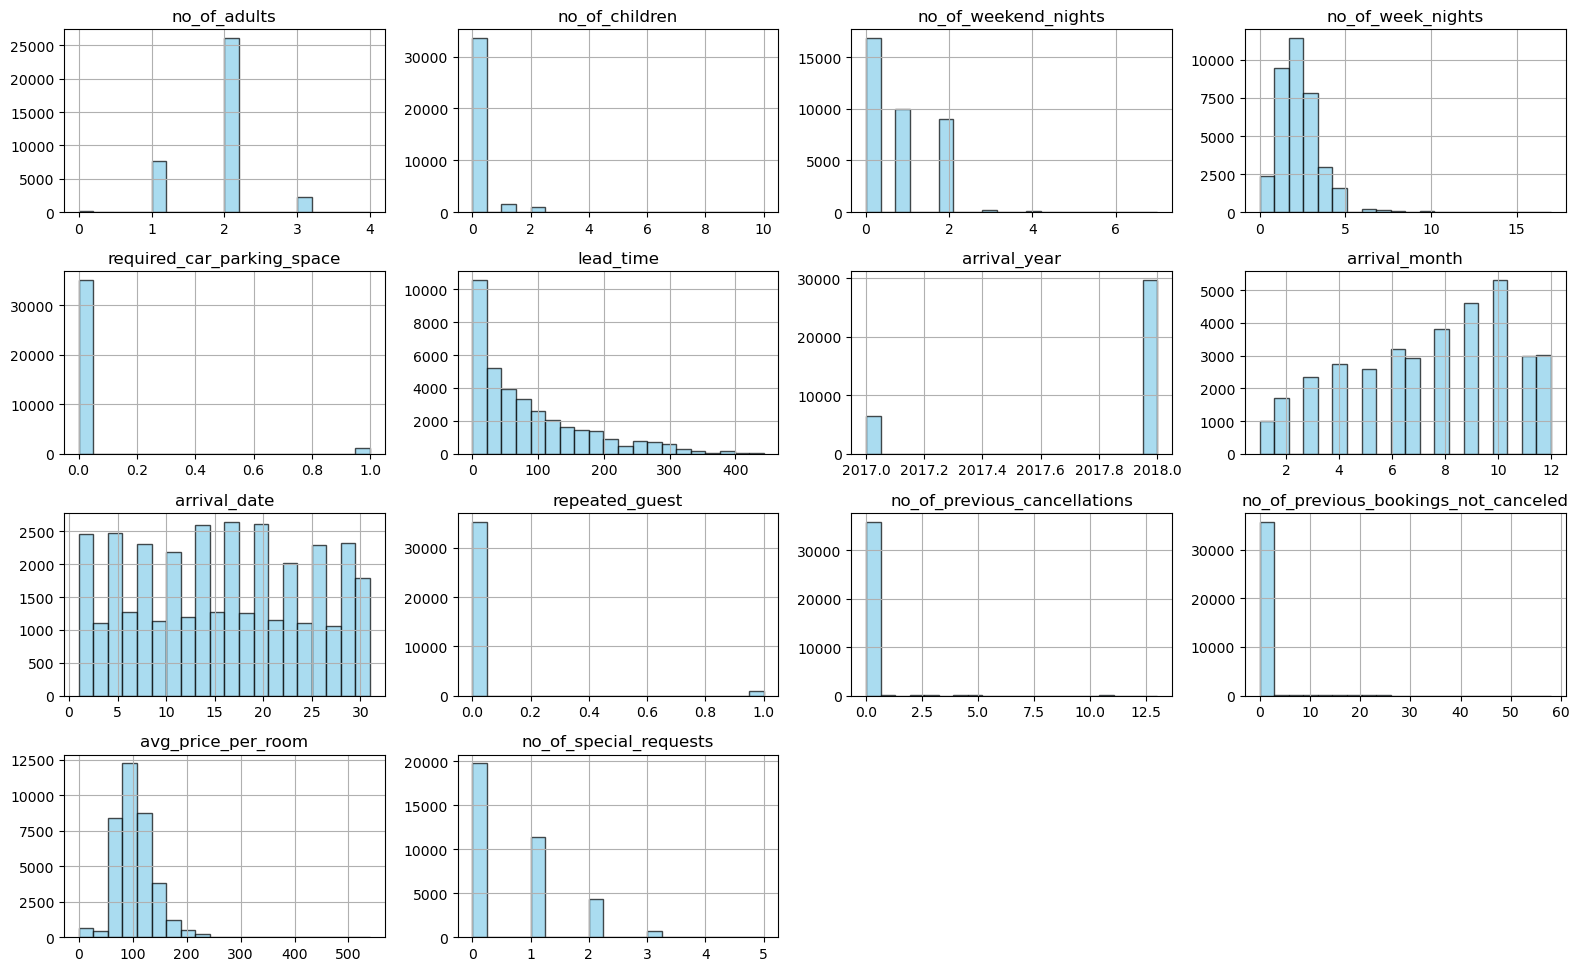

In [11]:
df.hist(bins=20, figsize=(16, 12), color='skyblue', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

+ Se observa el número total de **valores únicos** en las columnas categóricas.

In [12]:
display(df[cat_col].nunique())

Booking_ID             36275
type_of_meal_plan          4
room_type_reserved         7
market_segment_type        5
booking_status             2
dtype: int64

In [13]:
# Valores únicos de cada columna categórica
print('\'type_of_meal_plan\':\n', df['type_of_meal_plan'].unique())
print('\n\'room_type_reserved\':\n', df['room_type_reserved'].unique())
print('\n\'market_segment_type\':\n', df['market_segment_type'].unique())
print('\n\'booking_status\':\n', df['booking_status'].unique())

'type_of_meal_plan':
 ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

'room_type_reserved':
 ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

'market_segment_type':
 ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']

'booking_status':
 ['Not_Canceled' 'Canceled']


+ Se observan los **valores atípicos** de los atributos con desviación estandar mayor a 10.

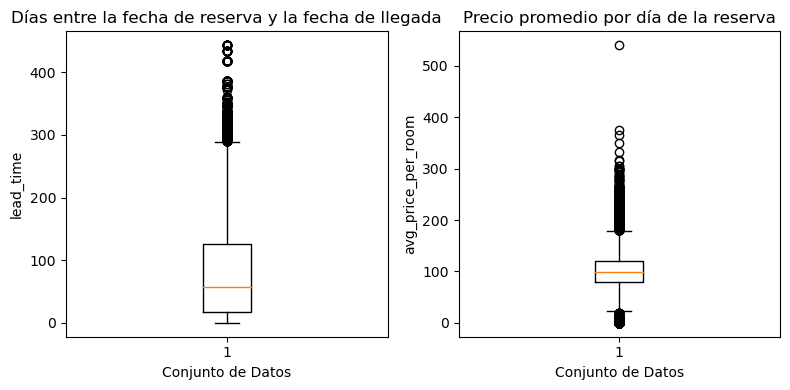

In [14]:
# Se crea un gráfico de dos boxplots
plt.figure(figsize=(8, 4))  

# Boxplot para lead_time
plt.subplot(1, 2, 1)  # Subgráfico 1 de 2
plt.boxplot(df['lead_time'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('lead_time')
plt.title("Días entre la fecha de reserva y la fecha de llegada") 

# Boxplot para avg_price_per_room
plt.subplot(1, 2, 2)  # Subgráfico 2 de 2
plt.boxplot(df['avg_price_per_room'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('avg_price_per_room')
plt.title("Precio promedio por día de la reserva")  

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

+ Se observa la **distribución de las clases**.

<Axes: ylabel='booking_status'>

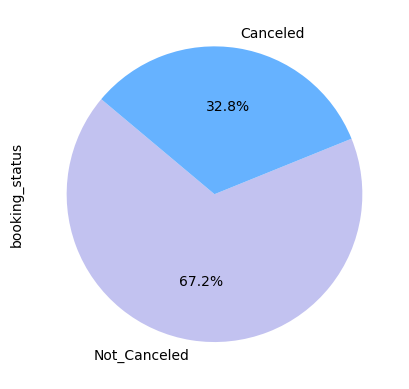

In [15]:
#Definimos colores pasteles (morado, azul y verde)
colors = ['#c2c2f0', '#66B2FF', '#99FF99']

#Gráfico de pastel
df['booking_status'].value_counts().plot(kind = "pie", colors = colors, 
                                         autopct='%1.1f%%', startangle=140)

**Observaciones después de explorar los datos:**

+ El dataset consta de 19 atributos y 36,275 instancias.
+ No se encuentran valores nulos ni filas duplicadas en el conjunto de datos.
+ Los datos corresponden a reservaciones desde el 01/01/2017 hasta el 31/12/2018.
+ Hay 5 atributos categóricos y 14 atributos numéricos.
+ Las columnas _type_of_meal_plan_ y _room_type_reserved_ no siguen el formato Cobra Case como el resto de las columnas categóricas.
+ Se consideran como valores atípicos las reservaciones realizadas con una antelación de 300 días o más, así como las habitaciones con precios superiores a 190 euros o inferiores a aproximadamente 30 euros. Sin embargo, se opta por mantenerlos en el conjunto de datos, ya que pueden ser relevantes para el modelo.

### <font color='navy'> **2. Limpieza de Datos** </font>

#### <font color='purple'> **Eliminación de datos redundantes** </font>

Los datos de la columna Booking_ID están compuestos por el prefijo INN seguido por el índice de la reservación. Este índice coincide con el índice del dataframe, con la única diferencia de que el dataframe comienza desde 0, mientras que el índice de la reservación empieza en 1. Debido a esto, consideramos que esta columna es redundante y procedemos a eliminarla.

In [16]:
df = df.drop('Booking_ID', axis = 1)
df.shape

(36275, 18)

#### <font color='purple'> **Estandarización** </font>

Realizamos la estandarización de los datos categóricos mediante la conversión al estilo de escritura Cobra Case, que es un formato en el cual la primera letra de cada palabra se escribe en mayúscula y los espacios se reemplazan por el carácter de subrayado (_).

Es importante notar que las columnas _market_segment_type_ y _booking_status_ ya están en formato Cobra Case, por lo que solo estandarizamos las columnas _type_of_meal_plan_ y _room_type_reserved_.

In [17]:
#Estandariza type_of_meal_plan a Cobra Case
df['type_of_meal_plan'] = pd.Series(df['type_of_meal_plan']).str.split().str.join('_')

#Estandariza room_type_reserved a Cobra Case
df['room_type_reserved'] = pd.Series(df['room_type_reserved']).str.split().str.join('_')

# Se muestran de nuevo los valores únicos de cada columna 
print('\'type_of_meal_plan\':\n', df['type_of_meal_plan'].unique())
print('\n\'room_type_reserved\':\n', df['room_type_reserved'].unique())

'type_of_meal_plan':
 ['Meal_Plan_1' 'Not_Selected' 'Meal_Plan_2' 'Meal_Plan_3']

'room_type_reserved':
 ['Room_Type_1' 'Room_Type_4' 'Room_Type_2' 'Room_Type_6' 'Room_Type_5'
 'Room_Type_7' 'Room_Type_3']


#### <font color='purple'> **Conversión de tipo de datos** </font>

Observemos que los valores únicos en las columnas _type_of_meal_plan_, _room_type_reserved_ y _booking_status_ pueden ser convertidos en valores numéricos de la siguiente manera:

1. **type_of_meal_plan:** Cada plan de comida puede ser etiquetado como 1, 2 o 3 respectivamente, con un valor de 0 en caso de no haber seleccionado un plan de comida.

In [18]:
#Pasamos la columna type_of_meal_plan a la serie convert_meal_plan
convert_meal_plan = pd.Series(df['type_of_meal_plan'])

#Reemplazamos el dato Meal_Plan_i por i 
for i in range (4):
    convert_meal_plan = convert_meal_plan.replace('Meal_Plan_' + str(i), i)   
#Reemplazamos el dato Not_Selected por 0
convert_meal_plan = convert_meal_plan.replace('Not_Selected', 0)

#Reemplazamos la columna type_of_meal_plan por la serie convert_meal_plan
df['type_of_meal_plan'] = convert_meal_plan

# Se muestran los nuevos valores únicos de la columna type_of_meal_plan
print('\'type_of_meal_plan\':\n', df['type_of_meal_plan'].unique())

'type_of_meal_plan':
 [1 0 2 3]


2. **room_type_reserved:** Dado que existen 7 tipos de habitaciones, cada una puede ser representada con los valores 1, 2, 3, 4, 5, 6 y 7 respectivamente.

In [19]:
#Pasamos la columna room_type_reserved a la serie convert_room
convert_room = pd.Series(df['room_type_reserved'])

#Reemplazamos el dato Room_Type_i por i 
for i in range (8):
    convert_room = convert_room.replace('Room_Type_' + str(i), i)   
    
#Reemplazamos la columna room_type_reserved por la serie convert_room
df['room_type_reserved'] = convert_room

# Se muestran los nuevos valores únicos de la columna room_type_reserved
print('\'room_type_reserved\':\n', df['room_type_reserved'].unique())

'room_type_reserved':
 [1 4 2 6 5 7 3]


3. **booking_status:** El estado de la reservación puede ser categorizado como "Canceled" o "Not_Canceled" por lo que se les pueden asignar los valores 0 - Cancelada, 1 - No cancelada.

In [20]:
#Reemplazamos los dos estados de la reservación por 0 y 1 respectivamente
df['booking_status'] = pd.Series(df['booking_status']).replace('Canceled', 0)
df['booking_status'] = pd.Series(df['booking_status']).replace('Not_Canceled', 1)

# Se muestran los nuevos valores únicos de la columna booking_status
print('\'booking_status\':\n', df['booking_status'].unique())

'booking_status':
 [1 0]


Para mayor conveniencia, también convertiremos la columna _market_segment_type_ en valores numéricos para facilitar el procesamiento de los datos. Sin embargo, es importante destacar que estos valores son originalmente cualitativos nominales, lo que significa que no tienen un valor cuantitativo y su orden no es relevante.

4. **market_segment_type:** Por razones de simplicidad, asignaremos valores numéricos del 1 al 5 respectivamente a cada categoría. 

In [21]:
#Reemplazamos las categorías por números del 1 al 7 respectivamente
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Offline', 1)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Online', 2)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Corporate', 3)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Aviation', 4)
df['market_segment_type'] = pd.Series(df['market_segment_type']).replace('Complementary', 5)

Notemos que ahora las columnas originalmente categóricas contienen valores numéricos por lo que podemos observar la estructura descriptiva de los datos. 

In [22]:
new_numeric_columns = ['type_of_meal_plan','room_type_reserved',
                       'market_segment_type', 'booking_status']
display(df[new_numeric_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   type_of_meal_plan    36275 non-null  int64
 1   room_type_reserved   36275 non-null  int64
 2   market_segment_type  36275 non-null  int64
 3   booking_status       36275 non-null  int64
dtypes: int64(4)
memory usage: 1.1 MB


None

In [23]:
display(df[new_numeric_columns].describe())

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000
mean,0.949966,1.708890,1.804604,0.672364
std,0.480191,1.399851,0.646881,0.469358
min,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000
max,3.000000,7.000000,5.000000,1.000000


Contamos ahora con solo columnas numéricas en el dataframe.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

### <font color='navy'> **3. Aumento de Datos** </font>

En el análisis exploratio de los datos se observó que hay menos reservaciones canceladas que no canceladas. Este desequilibrio en las clases puede ocasionar que los modelos de Machine Learning se sesguen hacia la clase con más instancias. Para evitar este sobreajuste a los datos originales, recurriremos al aumento de datos.

In [25]:
print('Número de reservaciones no canceladas:\t', (df['booking_status'] == 1).sum())
print('Número de reservaciones canceladas:\t', (df['booking_status'] == 0).sum())
print('Diferencia de instancias entre clases:\t',
      (df['booking_status'] == 1).sum() - (df['booking_status'] == 0).sum())

Número de reservaciones no canceladas:	 24390
Número de reservaciones canceladas:	 11885
Diferencia de instancias entre clases:	 12505


De lo anterior, podemos observar que es necesario generar 12505 instancias de reservaciones canceladas para balancear las clases. 

#### <font color='purple'> **Synthetic Minority Over-sampling Technique (SMOTE)** </font>

Para esto se recurrirá a una técnica de sobremuestreo (oversampling) llamada _Synthetic Minority Over-sampling Technique_ (SMOTE), la cual crea muestras sintéticas interpolando entre ejemplos de la clase minoritaria.

In [26]:
# Se divide el conjunto de datos en características (X) y clase (y)
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [27]:
# Se aplica la técnica SMOTE para aumentar la clase minoritaria
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [28]:
# Creamos un DataFrame a partir de las características aumentadas
df_X = pd.DataFrame(X_resampled, columns=X.columns)

# Creamos un DataFrame a partir de la clase aumentada
df_y = pd.DataFrame(y_resampled, columns=['booking_status'])

# Combinamos los DataFrames aumentados
df_au = pd.concat([df_X, df_y], axis=1)

In [29]:
print('Número de reservaciones no canceladas:\t', (df_au['booking_status'] == 1).sum())
print('Número de reservaciones canceladas:\t', (df_au['booking_status'] == 0).sum())
print('Diferencia de instancias entre clases:\t',
      (df_au['booking_status'] == 1).sum() - (df_au['booking_status'] == 0).sum())

Número de reservaciones no canceladas:	 24390
Número de reservaciones canceladas:	 24390
Diferencia de instancias entre clases:	 0


Las clases ahora están balanceadas.
Observemos la estructura descriptiva de los datos antes y después del aumento.

In [30]:
# Se calculan las estadísticas descriptivas para df y df_au
df_stats = df.describe()
df_au_stats = df_au.describe()

# Se seleccionan las estadísticas clave (media, mediana y desviación estándar)
key_stats = ['mean', '50%', 'std']

# Se unen las estadísticas descriptivas de df y df_au en un solo dataframe
df_compare = pd.concat([df_stats.loc[key_stats], df_au_stats.loc[key_stats]], 
                      keys=['Original', 'Aumentada'], axis=0)

# Se muestra la comparacion
print("Comparación de estadísticas descriptivas (media, mediana y desviación estándar):")
display(df_compare.T)

Comparación de estadísticas descriptivas (media, mediana y desviación estándar):


Original                      \
                                             mean      50%        std   
no_of_adults                             1.844962     2.00   0.518715   
no_of_children                           0.105279     0.00   0.402648   
no_of_weekend_nights                     0.810724     1.00   0.870644   
no_of_week_nights                        2.204300     2.00   1.410905   
type_of_meal_plan                        0.949966     1.00   0.480191   
required_car_parking_space               0.030986     0.00   0.173281   
room_type_reserved                       1.708890     1.00   1.399851   
lead_time                               85.232557    57.00  85.930817   
arrival_year                          2017.820427  2018.00   0.383836   
arrival_month                            7.423653     8.00   3.069894   
arrival_date                            15.596995    16.00   8.740447   
market_segment_type                      1.804604     2.00   0.646881   
repeated_guest                           0.025637     0.00   0.158053   
no_of_previous_cancellations             0.023349     0.00   0.368331   
no_of_previous_bookings_not_canceled     0.153411     0.00   1.754171   
avg_price_per_room                     103.423539    99.45  35.089424   
no_of_special_requests                   0.619655     0.00   0.786236   
booking_status                           0.672364     1.00   0.469358   

                                        Aumentada                     
                                             mean     50%        std  
no_of_adults                             1.837208     2.0   0.507963  
no_of_children                           0.096248     0.0   0.384330  
no_of_weekend_nights                     0.773985     1.0   0.850535  
no_of_week_nights                        2.178946     2.0   1.386848  
type_of_meal_plan                        0.936060     1.0   0.500099  
required_car_parking_space               0.023391     0.0   0.151143  
room_type_reserved                       1.694711     1.0   1.372738  
lead_time                               98.697089    71.0  92.032468  
arrival_year                          2017.838294  2018.0   0.368184  
arrival_month                            7.345244     8.0   2.948399  
arrival_date                            15.555617    16.0   8.721287  
market_segment_type                      1.781775     2.0   0.610560  
repeated_guest                           0.019188     0.0   0.137187  
no_of_previous_cancellations             0.018614     0.0   0.336431  
no_of_previous_bookings_not_canceled     0.114535     0.0   1.514704  
avg_price_per_room                     105.243891   101.0  34.416404  
no_of_special_requests                   0.508549     0.0   0.735778  
booking_status                           0.500000     0.5   0.500005

**Observaciones:** 

Según la tabla anterior, en general, el comportamiento de los datos se mantiene después de aplicar el aumento de datos, ya que no hay un cambio drástico en las características descriptivas de estos. Sin embargo, para el atributo _lead_time_, sí se observa un cambio significativo en sus características en comparación con el resto de los atributos.

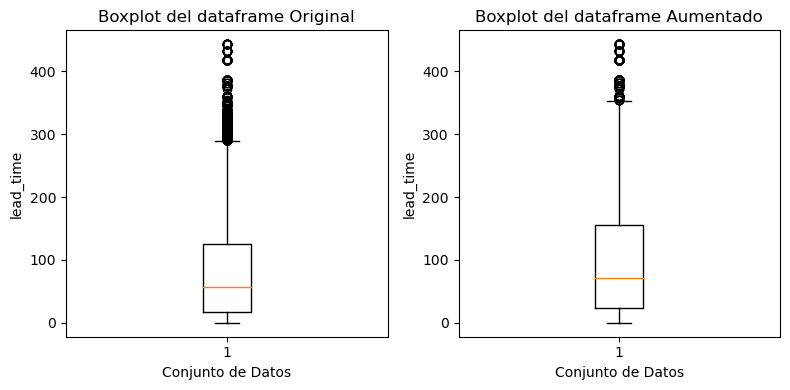

In [31]:
# Se crea un gráfico de dos boxplots
plt.figure(figsize=(8, 4))  

# Boxplot para df
plt.subplot(1, 2, 1)  # Subgráfico 1 de 2
plt.boxplot(df['lead_time'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('lead_time')
plt.title('Boxplot del dataframe Original')

# Boxplot para df_au
plt.subplot(1, 2, 2)  # Subgráfico 2 de 2
plt.boxplot(df_au['lead_time'])
plt.xlabel('Conjunto de Datos')
plt.ylabel('lead_time')
plt.title('Boxplot del dataframe Aumentado')

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

Es importante recordar que el atributo _lead_time_ originalmente tenía una desviación estándar mayor, lo que causaba la presencia de varios valores atípicos. Al aplicar el aumento de datos, es posible que se haya producido un aumento en la cantidad de datos atípicos, lo cual habría modificado ligeramente sus características descriptivas.

Comparemos ahora los **histogramas antes y después del aumento**.

Histogramas de los datos originales


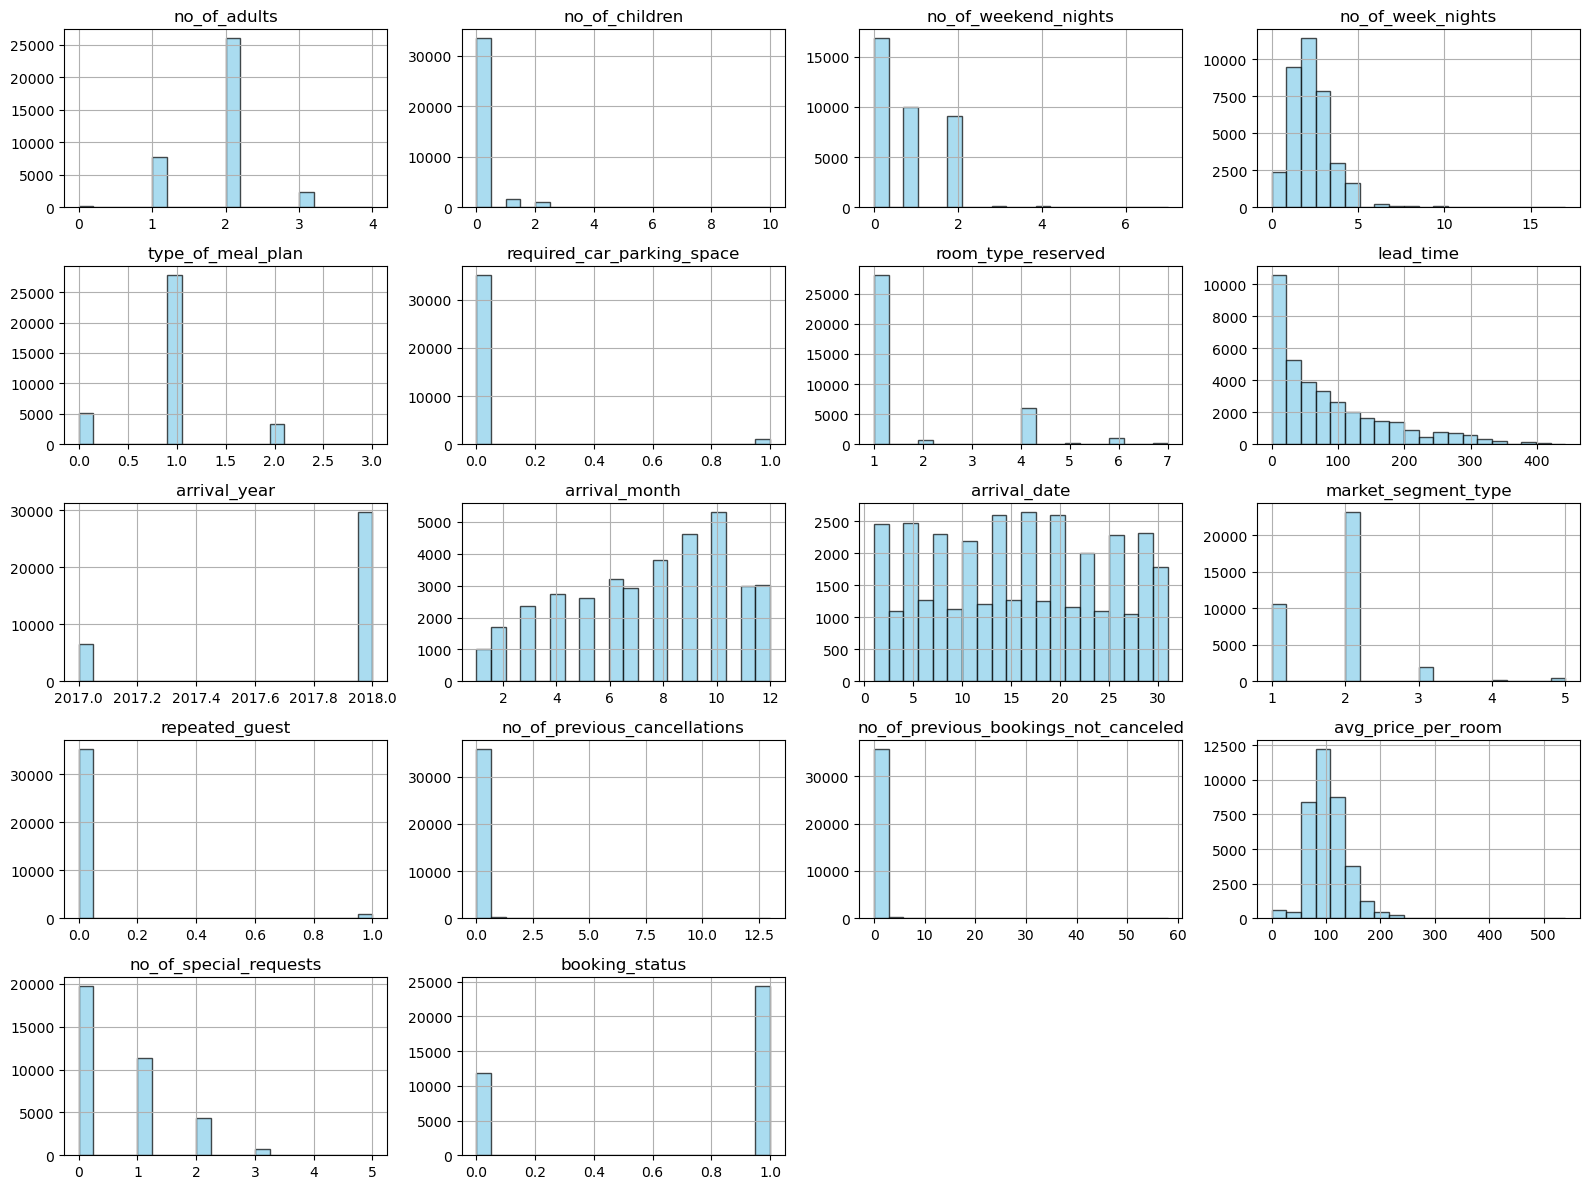

In [32]:
df.hist(bins=20, figsize=(16, 12), color='skyblue', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

print('Histogramas de los datos originales')
plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

Histogramas de los datos aumentados


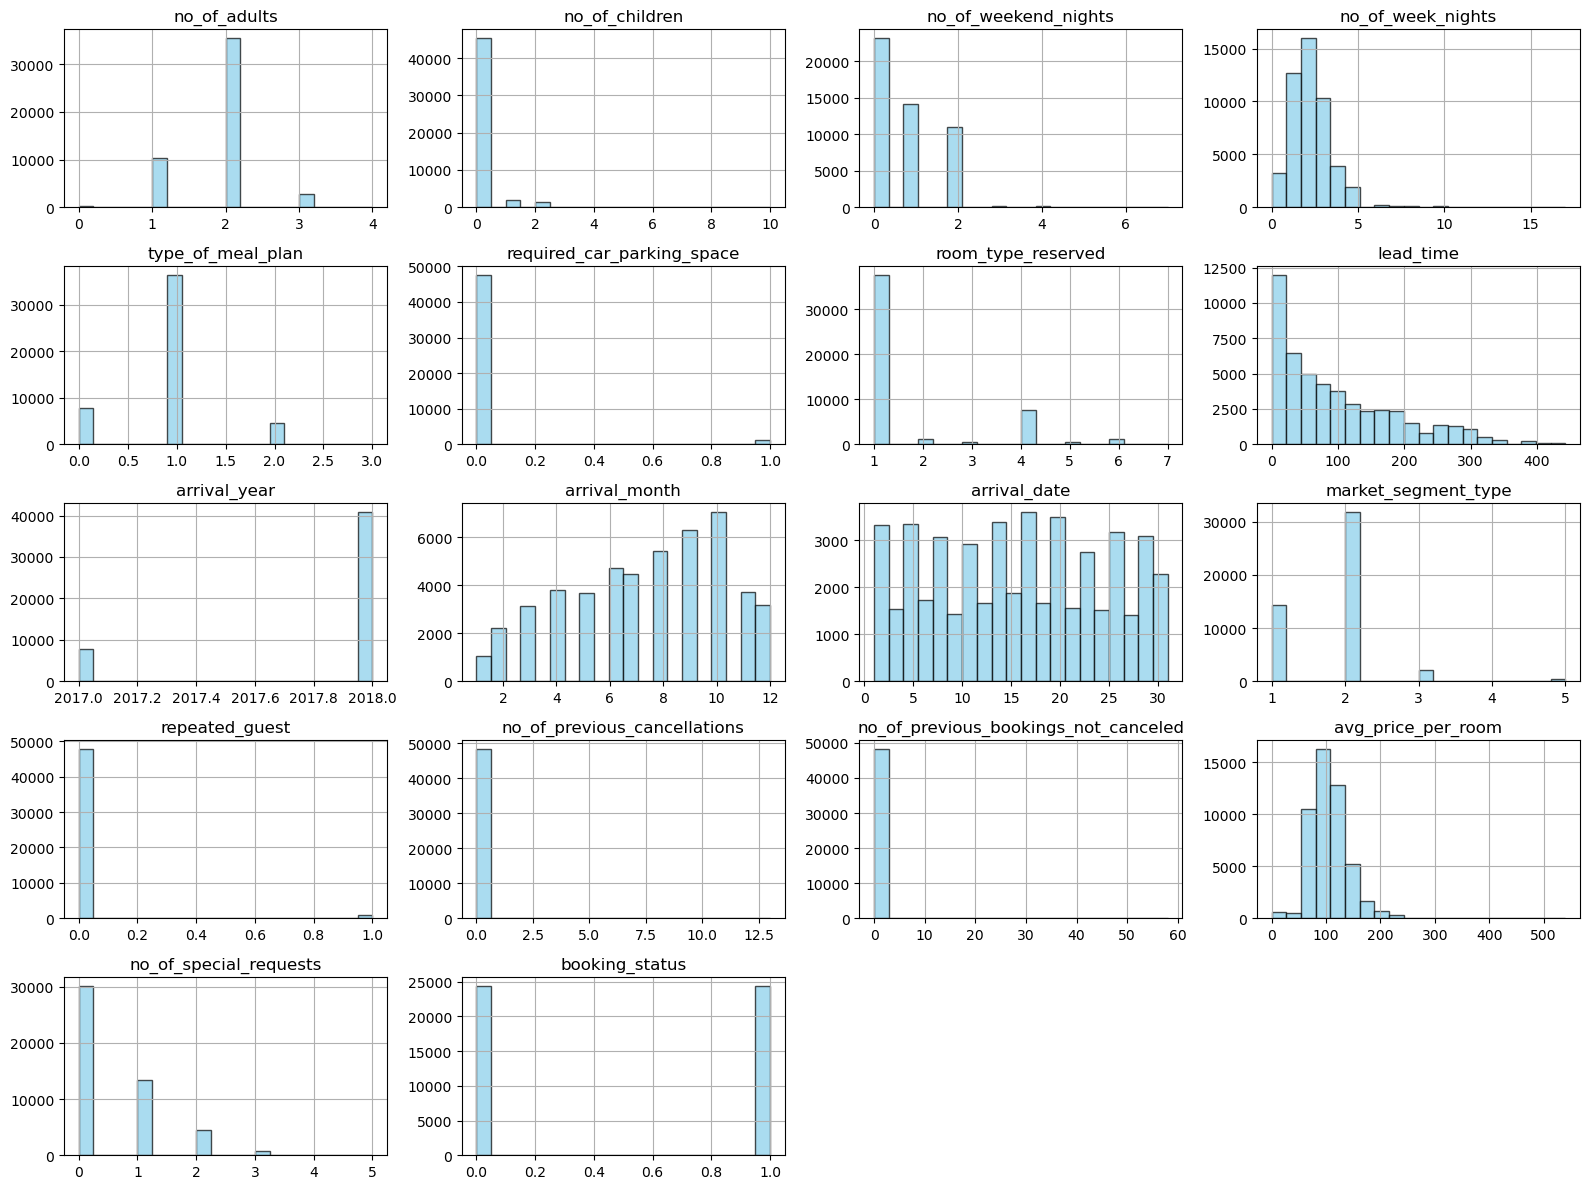

In [33]:
df_au.hist(bins=20, figsize=(16, 12), color='skyblue', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

print('Histogramas de los datos aumentados')
plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

**Observaciones:**

A partir de los histogramas anteriores, se puede observar que el comportamiento de los datos es consistente tanto antes como después del aumento de datos. Esto nos lleva a concluir que el conjunto de datos aumentado representa adecuadamente el comportamiento de los datos originales. Por lo tanto, procedemos a trabajar exclusivamente con los datos aumentados.

In [34]:
df = df_au

### <font color='navy'> **4. Selección de características** </font>

Procedemos a seleccionar las características más relevantes respecto a la clase. 

In [35]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

#### <font color='purple'> **Métodos _Filter_** </font>

+ **Ganancia de información**

Este método estima la información mutua para una variable objetivo (clase) discreta. La información mutua entre dos variables es un valor no negativo que mide la dependencia entre ellas. Se iguala a cero si y solo si las dos variables son independientes, y valores más altos indican una mayor dependencia.

Esta variable se calcula mediante la diferencia entre la entropía antes y después de conocer el valor de una característica. La entropía mide la impureza o incertidumbre en un conjunto de datos.

In [36]:
def info_gain(X,y):
    X_new = mutual_info_classif(X, y)
    feat_imp = pd.Series(X_new, df.columns[0:len(df.columns)-1])
    feat_imp_sorted = feat_imp.sort_values(ascending=True)
    feat_imp_sorted.plot(kind='barh')

    plt.title('Atributos con mayor ganancia de información')
    plt.show()

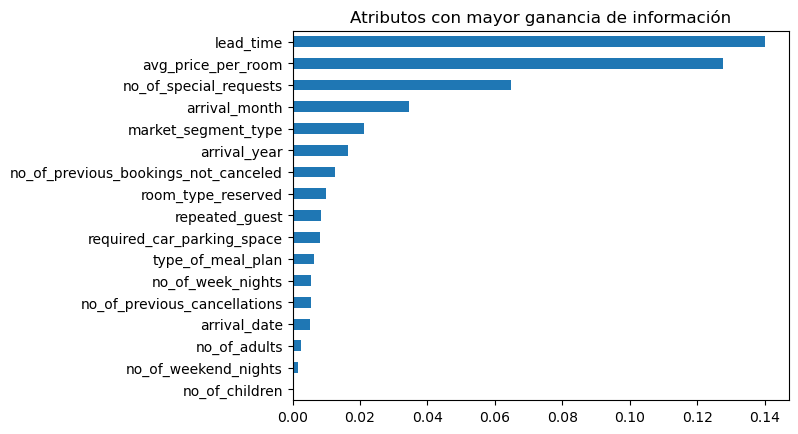

In [37]:
info_gain(X,y)

**Observaciones:**

Los 5 atributos con mayor relevancia son
1. _lead_time_
2. _avg_price_per_room_
3. _no_of_special_request_
4. _arrival_month_
5. _market_segment_type_

+ **Chi-cuadrado**

Este método calcula las estadísticas de chi-cuadrado entre cada característica y la clase (las cuales deben ser no negativas). La prueba de chi-cuadrado mide la dependencia entre variables estocásticas, por lo que el uso de esta función "elimina" las características que tienen una mayor probabilidad de ser independientes de la clase y, por lo tanto, resultan irrelevantes para la clasificación.

In [38]:
def metodo_chi2(X,y,n):    
    #Aplicamos el método Chi2
    chi2_feat = SelectKBest(chi2, k=n) 
    X_new = chi2_feat.fit_transform(X, y) 

    #Puntuaciones Chi2 de cada característica
    chi2_scores = chi2_feat.scores_ 

    # Creamos un DataFrame con los nombres de las características y sus puntuaciones Chi2
    chi2_fs = pd.DataFrame({'Atributo': X.columns, 'Puntuación Chi2': chi2_scores})

    # Se ordenan las características en orden descendente
    chi2_fs = chi2_fs.sort_values(by='Puntuación Chi2', ascending=False)

    # Imprimir las características ordenadas por importancia
    print('Características más relevantes')
    display(chi2_fs.head(5))

In [39]:
#Datos Originales
metodo_chi2(X,y,5) #Selecciona las 5 características más importantes

Características más relevantes


,Atributo,Puntuación Chi2
7,lead_time,781710.021069
15,avg_price_per_room,13080.956020
16,no_of_special_requests,5995.002419
14,no_of_previous_bookings_not_canceled,5396.649544
12,repeated_guest,850.068376


**Observaciones:**

Tanto en el método de Ganancia de Información como en el método de Chi-cuadrado, los atributos _lead_time_, _avg_price_per_room_ y _no_of_special_requests_ se encuentran entre los atributos más relevantes.

#### <font color='purple'> **Métodos _Wrapper_** </font>

Antes de elegir las características obtenidas mediante los métodos de Ganancia de Información y Chi-cuadrado, vamos a comparar con los atributos seleccionados utilizando un método Wrapper.

+ **Selección hacia adelante**

Este método es un algoritmo de selección de características secuenciales. El objetivo de estos algoritmos es seleccionar automáticamente un subconjunto de características más relevantes para el problema.
Este método comienza sin tener características en el modelo (Regresión Lineal). En cada iteración, selecciona una característica que mejore el modelo en combinación con las características previamente seleccionadas. Este proceso continúa hasta que la adición de una nueva variable ya no mejora el rendimiento del modelo.

In [40]:
# Modelo utilizado (Regresión lineal)
lr = LinearRegression() 
#Selección hacia adelante
ffs = SequentialFeatureSelector(lr, k_features='best', forward = True) 

In [41]:
ffs.fit(X, y)
features = list(ffs.k_feature_names_)
X_features = pd.DataFrame({'Atributos': features})
print('Características más relevantes')
display(X_features)

Características más relevantes


,Atributos
0,no_of_weekend_nights
1,type_of_meal_plan
2,required_car_parking_space
3,room_type_reserved
4,lead_time
5,arrival_year
6,arrival_month
7,market_segment_type
8,repeated_guest
9,no_of_previous_bookings_not_canceled


**Observaciones**

Al utilizar el método de Selección Hacia Adelante, se obtienen 12 características relevantes. Es importante destacar que se seleccionaron más de 5 características. Esto implica que, al emplear los resultados de los métodos tipo _Filter_, si bien las características seleccionadas son relevantes, también estaríamos eliminando características que son importantes para la clasificación.

Asimismo, recordemos que el propósito de la selección de atributos es mejorar el rendimiento del modelo al reducir la dimensionalidad de los datos y centrarse en los atributos más relevantes, evitando problemas como la maldición de la dimensionalidad y el sobreajuste del modelo. Por lo tanto, optaremos por seleccionar las características obtenidas mediante el método tipo _Wrapper_ (Selección Hacia Adelante).

In [42]:
df = pd.concat([X[X_features['Atributos']], y], axis=1)

### <font color='navy'> **5. Exploración del Dataset Procesado** </font>

+ Se inspecciona la **estructura del dataset**.

In [43]:
#(Por razones de visualización se muestran las instancias como columnas)
display(df.head().T)

,0,1,2,3,4
no_of_weekend_nights,1.0,2.00,2.0,0.0,1.0
type_of_meal_plan,1.0,0.00,1.0,1.0,0.0
required_car_parking_space,0.0,0.00,0.0,0.0,0.0
room_type_reserved,1.0,1.00,1.0,1.0,1.0
lead_time,224.0,5.00,1.0,211.0,48.0
arrival_year,2017.0,2018.00,2018.0,2018.0,2018.0
arrival_month,10.0,11.00,2.0,5.0,4.0
market_segment_type,1.0,2.00,2.0,2.0,2.0
repeated_guest,0.0,0.00,0.0,0.0,0.0
no_of_previous_bookings_not_canceled,0.0,0.00,0.0,0.0,0.0


+ Se revisa el **tamaño** del dataframe.

In [44]:
df.shape

(48780, 13)

+ Se observan las **columnas categóricas y numéricas**.

In [45]:
# Columnas categóricas
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns:\t',cat_col)

# Columnas numéricas
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('\nNumerical columns:\t',num_col)

Categorical columns:	 []

Numerical columns:	 ['no_of_weekend_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


+ Se revisa la **información de los datos**.

In [46]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48780 entries, 0 to 48779
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_weekend_nights                  48780 non-null  int64  
 1   type_of_meal_plan                     48780 non-null  int64  
 2   required_car_parking_space            48780 non-null  int64  
 3   room_type_reserved                    48780 non-null  int64  
 4   lead_time                             48780 non-null  int64  
 5   arrival_year                          48780 non-null  int64  
 6   arrival_month                         48780 non-null  int64  
 7   market_segment_type                   48780 non-null  int64  
 8   repeated_guest                        48780 non-null  int64  
 9   no_of_previous_bookings_not_canceled  48780 non-null  int64  
 10  avg_price_per_room                    48780 non-null  float64
 11  no_of_special_r

None

+ Se revisa la **estructura descriptiva** de los datos cuantitativos.

In [47]:
#(Por razones de visualización se muestran los atributos como renglones)
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
no_of_weekend_nights,48780.0,0.773985,0.850535,0.0,0.0,1.0,1.00000,7.0
type_of_meal_plan,48780.0,0.936060,0.500099,0.0,1.0,1.0,1.00000,3.0
required_car_parking_space,48780.0,0.023391,0.151143,0.0,0.0,0.0,0.00000,1.0
room_type_reserved,48780.0,1.694711,1.372738,1.0,1.0,1.0,1.00000,7.0
lead_time,48780.0,98.697089,92.032468,0.0,23.0,71.0,155.00000,443.0
arrival_year,48780.0,2017.838294,0.368184,2017.0,2018.0,2018.0,2018.00000,2018.0
arrival_month,48780.0,7.345244,2.948399,1.0,5.0,8.0,10.00000,12.0
market_segment_type,48780.0,1.781775,0.610560,1.0,1.0,2.0,2.00000,5.0
repeated_guest,48780.0,0.019188,0.137187,0.0,0.0,0.0,0.00000,1.0
no_of_previous_bookings_not_canceled,48780.0,0.114535,1.514704,0.0,0.0,0.0,0.00000,58.0


+ Se observan los **histogramas**.

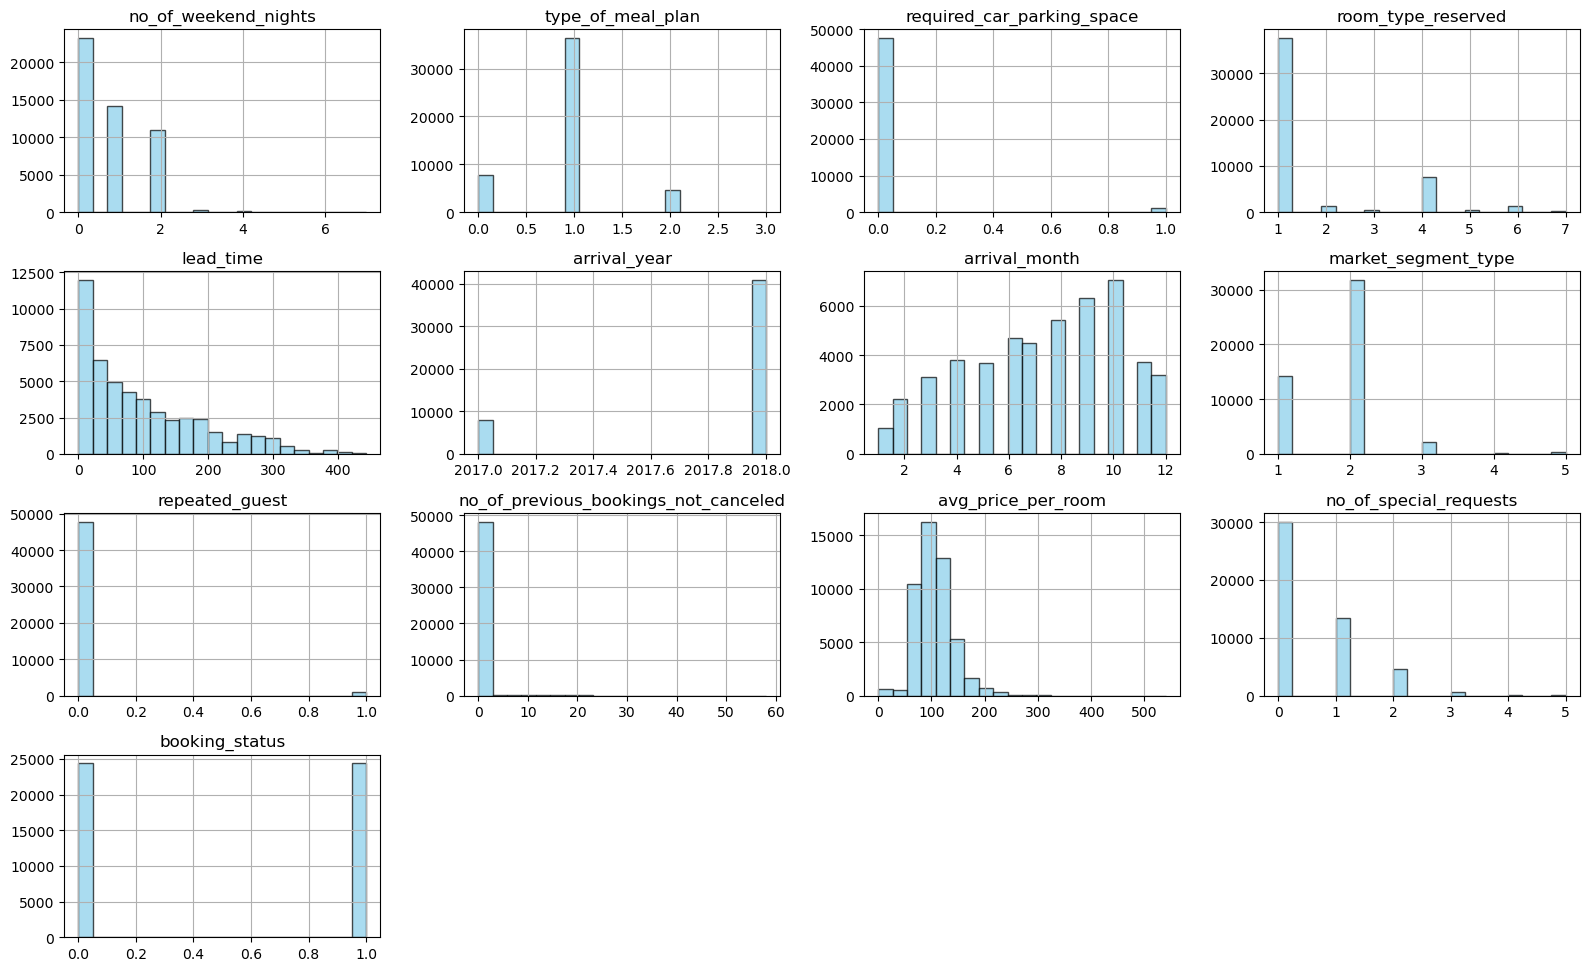

In [48]:
df.hist(bins=20, figsize=(16, 12), color='skyblue', 
        edgecolor='black', alpha=0.7, layout=(5, 4))

plt.tight_layout()  # Ajusta el espaciado para evitar superposiciones
plt.show()

+ Se observa la **distribución de las clases**.

<Axes: ylabel='booking_status'>

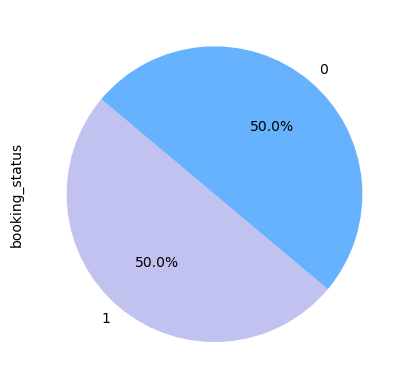

In [49]:
#Definimos colores pasteles (morado, azul y verde)
colors = ['#c2c2f0', '#66B2FF', '#99FF99']

#Gráfico de pastel
df['booking_status'].value_counts().plot(kind = "pie", colors = colors, 
                                         autopct='%1.1f%%', startangle=140)

**Observaciones después de explorar los datos:**

+ El dataset consta de 13 atributos y 48,780 instancias.
+ Todos los atributos son numéricos.
+ El dataset conserva su comportamiento original.
+ Las clases están balanceadas.

### <font color='navy'> **Conclusión** </font>

Se llevó a cabo el procesamiento de un dataset correspondiente a las reservaciones de un hotel registradas desde el 01/01/2017 hasta el 31/12/2018. El propósito de este procesamiento fue preparar los datos para la aplicación posterior de un modelo de Machine Learning capaz de predecir si una reservación será cancelada o no, basándose en una instancia dada.

Inicialmente, el dataset no presentaba datos incompletos ni duplicados. No obstante, durante la limpieza de los datos, fue necesario eliminar redundancias, llevar a cabo la estandarización y la conversión de tipos de datos. Esto se hizo con el fin de trabajar únicamente con atributos numéricos, lo cual facilitará la aplicación de modelos en el dataset.

Posteriormente, se identificó un desequilibrio en las clases (reservación cancelada o no cancelada). Este desequilibrio podría provocar un sesgo en los modelos de Machine Learning hacia la clase con más instancias. Para abordar este problema, se decidió aplicar un aumento de datos mediante la técnica de sobremuestreo conocida como _Synthetic Minority Over-sampling Technique (SMOTE)_. Esta técnica genera muestras sintéticas interpolando entre ejemplos de la clase minoritaria. Además, se verificó que el nuevo conjunto de datos aumentados conservara el comportamiento de los datos originales antes de tomar la decisión final de trabajar con el dataset aumentado.

Luego, se llevó a cabo el proceso de selección de características, comparando tres métodos diferentes: dos de tipo _Filter_ (Ganancia de Información y Chi-cuadrado) y uno de tipo _Wrapper_ (Selección Hacia Adelante). Después de esta comparación, se decidió conservar los atributos seleccionados mediante el método de Selección Hacia Adelante.

Finalmente, se llevó a cabo una exploración del dataset procesado y se observó que conserva el mismo comportamiento que el dataset original. Además, se notó que las clases están balanceadas, lo que evitará un posible sesgo al aplicar un modelo de Machine Learning a los datos.

### <font color='navy'> **Referencias** </font>

+ Raza, A. (2023). Hotel Reservations Dataset. Kaggle. URL: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset